In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

In [3]:
df_data = pd.read_csv(r"output_data_sets/combined_dataset.csv", sep=',')

In [4]:
df_data[:3]

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,weather_main_drizzle_Valencia,weather_main_dust_Valencia,weather_main_fog_Valencia,weather_main_haze_Valencia,weather_main_mist_Valencia,weather_main_rain_Valencia,weather_main_smoke_Valencia,weather_main_snow_Valencia,weather_main_squall_Valencia,weather_main_thunderstorm_Valencia
0,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_data=df_data[['total load forecast', 'total load actual', 'price day ahead',
       'price actual']]

In [6]:
def score_report(prediction, target):
    
    mse = mean_squared_error(target, prediction)
    rmse = mean_squared_error(target, prediction, squared=False)
    mae = mean_absolute_error(target, prediction)
    r2 = r2_score(target, prediction)
    
    print("Score Results:")
    print("Mean squared error: %.2f" % mse)
    print("Root mean squared error: %.2f" % rmse)
    print("Mean absolute error: %.2f" % mae)
    print("Coefficient of determination: %.4f" % r2)
    print('Predicted mean: %.3f (%.3f)' % (np.mean(prediction), np.std(prediction)))
    print('Actual mean: %.3f (%.3f)' % (np.mean(target), np.std(target)))
    
    return mse, rmse, mae, r2

In [7]:
def plot_charts(df):
    title_fondsize = 16
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5)) 
    mu = df["Predicted-Actual"].mean()
    sigma = df["Predicted-Actual"].std()
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (mu, ),
        r'$\sigma=%.2f$' % (sigma, ))) 
    mu_predicted_a = df["Actual"].mean()
    mu_predicted_t = df[f"Predicted"].mean()
    textstr_ax1 = '\n'.join((
        r'$\mu_{actual}=%.2f$' % (mu_predicted_a, ),
        r'$\mu_{predicted}=%.2f$' % (mu_predicted_t, ))) 


    ax1.hist(df["Actual"], color="darkgreen", bins = "fd", alpha = 0.3, label='Actual')
    ax1.hist(df[f"Predicted"], color="midnightblue", bins = "fd", alpha = 0.5, label='Predicted')
    ax1.axvline(df["Actual"].mean(), color='darkgreen', linestyle='dashed', linewidth=3)
    ax1.axvline(df[f"Predicted"].mean(), color='midnightblue', linestyle='dashed', linewidth=1)
    ax1.set_title(f'Histograms Actual vs Predicted', fontsize=title_fondsize)
    ax1.text(0.05, 0.95, textstr_ax1, transform=ax1.transAxes, fontsize=14, verticalalignment='top', horizontalalignment='left')
    ax1.legend()
    ax1.set_xlabel(f"Actual  vs Predicted") 
    ax1.set_ylabel("Density")

    
    ax2.scatter( df["Actual"], df[f"Predicted"], color="darkgreen", s=1, alpha = 0.5)
    ax2.set_xlabel("Actual")
    ax2.set_ylabel(f"Predicted Price")
    ax2.set_title(f'Actual  vs Predicted', fontsize=title_fondsize)
    
    ax3.scatter( df[f"Predicted"], df["Predicted-Actual"], color="midnightblue", alpha = 0.5, s=1)
    ax3.set_xlabel("Predicted")
    ax3.set_ylabel("Residuals")
    ax3.set_title('Residual vs Predicted', fontsize=title_fondsize)


    ax4.hist(df["Predicted-Actual"], color="crimson", bins = "fd", alpha = 0.8)
    ax4.axvline(mu, color='midnightblue', linestyle='dashed', linewidth=1)
    ax4.text(0.05, 0.95, textstr, transform=ax4.transAxes, fontsize=14, verticalalignment='top', horizontalalignment='left')
    ax4.set_xlabel(f"Residuals") 
    ax4.set_ylabel("Density")
    ax4.set_title('Residual plot', fontsize=title_fondsize)

    plt.tight_layout()
    plt.show()

# Load score

In [8]:
mse, rmse, mae, r2 = score_report(df_data['total load forecast'],df_data['total load actual'])

Score Results:
Mean squared error: 206707.53
Root mean squared error: 454.65
Mean absolute error: 316.89
Coefficient of determination: 0.9901
Predicted mean: 28712.130 (4594.035)
Actual mean: 28698.281 (4575.764)


In [9]:
df = df_data[['total load forecast','total load actual']]
df.columns = ['Predicted', 'Actual']
df["Predicted-Actual"] = df["Predicted"]-df["Actual"]

<ipython-input-9-f7ad7d313eb7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Predicted-Actual"] = df["Predicted"]-df["Actual"]


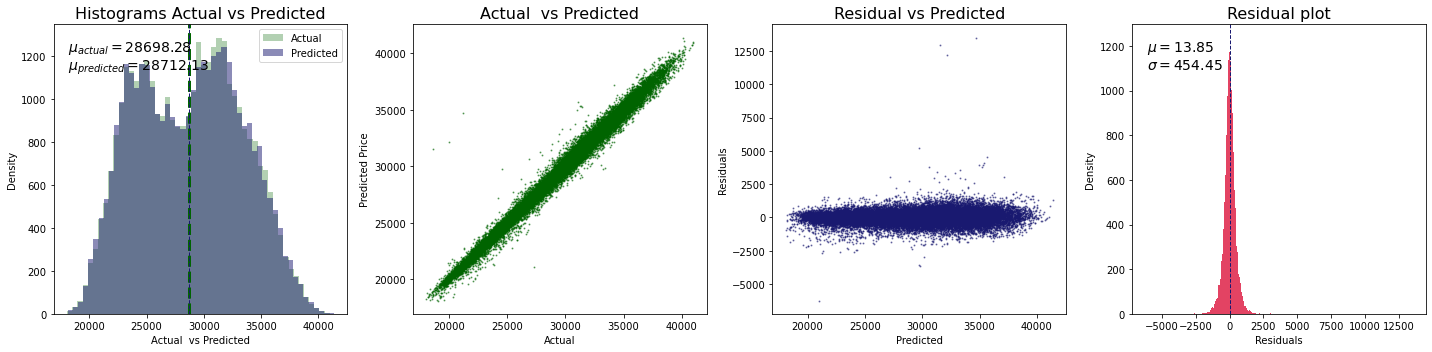

In [10]:
plot_charts(df)

# Price score

In [11]:
mse, rmse, mae, r2 = score_report(df_data['price day ahead'],df_data['price actual'])

Score Results:
Mean squared error: 175.56
Root mean squared error: 13.25
Mean absolute error: 10.49
Coefficient of determination: 0.1298
Predicted mean: 49.874 (14.619)
Actual mean: 57.884 (14.204)


In [12]:
df = df_data[['price day ahead','price actual']]
df.columns = ['Predicted', 'Actual']
df["Predicted-Actual"] = df["Predicted"]-df["Actual"]

<ipython-input-12-e4cc288f559c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Predicted-Actual"] = df["Predicted"]-df["Actual"]


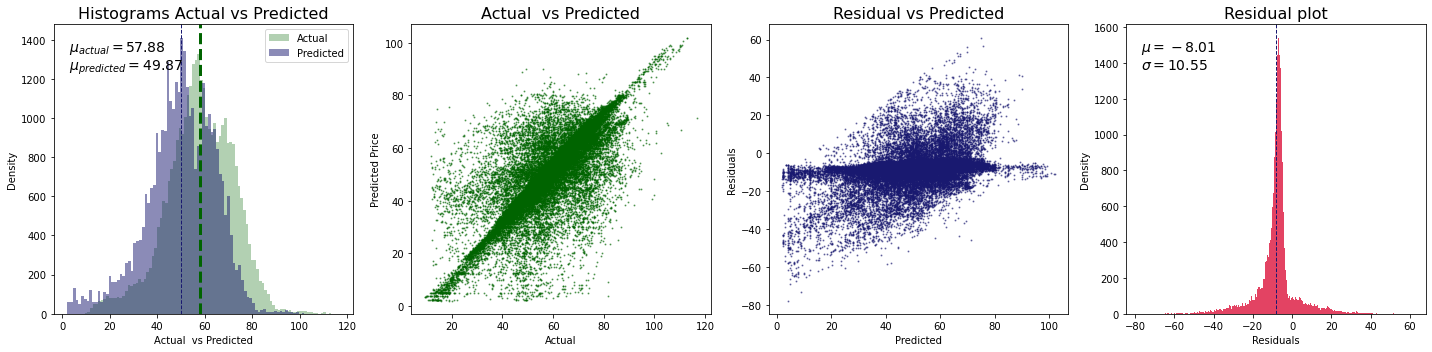

In [13]:
plot_charts(df)